<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/15_Puzzle_IBM_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IBM Ponder This Challene
by Alireza.Soroudi @gmail.com

https://research.ibm.com/haifa/ponderthis/challenges/March2024.html

In [ ]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from google.colab import files as FILE

#plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
nx, ny = 4 , 4
counter = 1
Nt = 46
dic={}
for j in range(ny):
  for i in range(nx):
    dic[counter,'x'] = i
    dic[counter,'y'] = ny-j-1
    dic[counter,'v'] = counter
    counter +=1
dic[16,'v'] = 0
dic

colors = ['w', 'green', 'red', 'cyan', 'magenta', 'navy', 'black', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'teal', 'maroon']
dic

{(1, 'x'): 0,
 (1, 'y'): 3,
 (1, 'v'): 1,
 (2, 'x'): 1,
 (2, 'y'): 3,
 (2, 'v'): 2,
 (3, 'x'): 2,
 (3, 'y'): 3,
 (3, 'v'): 3,
 (4, 'x'): 3,
 (4, 'y'): 3,
 (4, 'v'): 4,
 (5, 'x'): 0,
 (5, 'y'): 2,
 (5, 'v'): 5,
 (6, 'x'): 1,
 (6, 'y'): 2,
 (6, 'v'): 6,
 (7, 'x'): 2,
 (7, 'y'): 2,
 (7, 'v'): 7,
 (8, 'x'): 3,
 (8, 'y'): 2,
 (8, 'v'): 8,
 (9, 'x'): 0,
 (9, 'y'): 1,
 (9, 'v'): 9,
 (10, 'x'): 1,
 (10, 'y'): 1,
 (10, 'v'): 10,
 (11, 'x'): 2,
 (11, 'y'): 1,
 (11, 'v'): 11,
 (12, 'x'): 3,
 (12, 'y'): 1,
 (12, 'v'): 12,
 (13, 'x'): 0,
 (13, 'y'): 0,
 (13, 'v'): 13,
 (14, 'x'): 1,
 (14, 'y'): 0,
 (14, 'v'): 14,
 (15, 'x'): 2,
 (15, 'y'): 0,
 (15, 'v'): 15,
 (16, 'x'): 3,
 (16, 'y'): 0,
 (16, 'v'): 0}

{(1, 2): 1,
 (1, 5): 1,
 (2, 1): 1,
 (2, 3): 1,
 (2, 6): 1,
 (3, 2): 1,
 (3, 4): 1,
 (3, 7): 1,
 (4, 3): 1,
 (4, 8): 1,
 (5, 1): 1,
 (5, 6): 1,
 (5, 9): 1,
 (6, 2): 1,
 (6, 5): 1,
 (6, 7): 1,
 (6, 10): 1,
 (7, 3): 1,
 (7, 6): 1,
 (7, 8): 1,
 (7, 11): 1,
 (8, 4): 1,
 (8, 7): 1,
 (8, 12): 1,
 (9, 5): 1,
 (9, 10): 1,
 (9, 13): 1,
 (10, 6): 1,
 (10, 9): 1,
 (10, 11): 1,
 (10, 14): 1,
 (11, 7): 1,
 (11, 10): 1,
 (11, 12): 1,
 (11, 15): 1,
 (12, 8): 1,
 (12, 11): 1,
 (12, 16): 1,
 (13, 9): 1,
 (13, 14): 1,
 (14, 10): 1,
 (14, 13): 1,
 (14, 15): 1,
 (15, 11): 1,
 (15, 14): 1,
 (15, 16): 1,
 (16, 12): 1,
 (16, 15): 1}

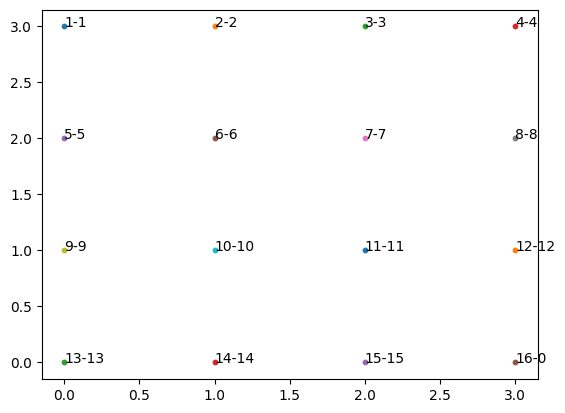

In [ ]:
def dist(n,m):
  x1,y1 = dic[n,'x'],dic[n,'y']
  x2,y2 = dic[m,'x'],dic[m,'y']
  return (x1-x2)**2 + (y1-y2)**2
nodes = [n for n in range(1,counter)]
allowed = {(n,m):1 for n in nodes for n in nodes for m in nodes if dist(n,m)==1}
for n in nodes:
  x1,y1 = dic[n,'x'],dic[n,'y']
  plt.scatter(x1,y1,s=10)
  plt.text(x1,y1,s=str(n) + "-" + str(dic[n,'v']))
nodes

diag1 = [13,10,7,4]
diag2 = [1,6,11,16]
allowed

In [ ]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
T = [t for t in range(1,1+Nt)]
U = {(i,t):model.NewBoolVar(f"connection_{i}_{t}") for i in nodes for t in T}
V = {(i,t):model.NewIntVar(0,15,f"connection_{i}_{t}") for i in nodes for t in T}

direction = {'dn':(0,4), 'up':(0,-4) , 'lf':(-1,0), 'rt':(1,0)}
move = {t:model.NewBoolVar(f"move_{d}_{t}") for d in direction for t in T}
cont = {t:model.NewBoolVar(f"cont_{t}") for t in T}

model.Add(U[16,1] == 1)
model.Add(V[16,1] == 0)
model.AddAtLeastOne([cont[t].Not() for t in T])

for t in T:
  exp_values = [V[i,t] for i in nodes]
  model.AddAllDifferent(exp_values)
  exp_U = [U[i,t] for i in nodes]
  model.AddExactlyOne(exp_U)
  for r in range(nx):
    model.Add(sum([V[n,t] for n in nodes if dic[n,'y']== r])== 30).OnlyEnforceIf(cont[t].Not())
    model.Add(sum([V[n,t] for n in nodes if dic[n,'x']== r])== 30).OnlyEnforceIf(cont[t].Not())
  model.Add(sum([V[n,t] for n in diag1])== 30).OnlyEnforceIf(cont[t].Not())
  model.Add(sum([V[n,t] for n in diag2])== 30).OnlyEnforceIf(cont[t].Not())
  if t ==1 :
    model.Add(cont[t] == 1)
    for i in nodes:
      model.Add(V[i,t] == dic[i,'v'])
  else:
    model.Add(cont[t] <= cont[t-1])
    for i in nodes:
      neighbors = [U[j,t-1] for j in nodes if (j,i) in allowed]
      #model.Add(sum(neighbors) == 1).OnlyEnforceIf(U[i,t-1] )
      model.Add(U[i,t]<=sum(neighbors))
      model.Add(  V[i,t-1] - V[i,t] <= 15*(U[i,t-1]+U[i,t]) )
      model.Add( -V[i,t-1] + V[i,t] <= 15*(U[i,t-1]+U[i,t]) )
      model.Add( V[i,t] ==0).OnlyEnforceIf(U[i,t])
      for j in nodes:
        if (i,j) in allowed:
          model.Add( V[i,t-1] - V[j,t] <= 15*(2-U[i,t-1]-U[j,t]) )
          model.Add(-V[i,t-1] + V[j,t] <= 15*(2-U[i,t-1]-U[j,t]) )
          model.Add( V[i,t] - V[j,t-1] <= 15*(2-U[i,t-1]-U[j,t]) )
          model.Add(-V[i,t] + V[j,t-1] <= 15*(2-U[i,t-1]-U[j,t]) )

      #model.Add(V[i,t] == V[i,t-1])
# Maximize x
expressions = [t*v.Not() for t,v in cont.items()]
#model.Minimize(sum(expressions))

status = solver.Solve(model)
if status == cp_model.INFEASIBLE:
  print('INFEASIBLE')
elif status in [cp_model.FEASIBLE , cp_model.OPTIMAL]:
  print('FEASIBLE')

FEASIBLE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

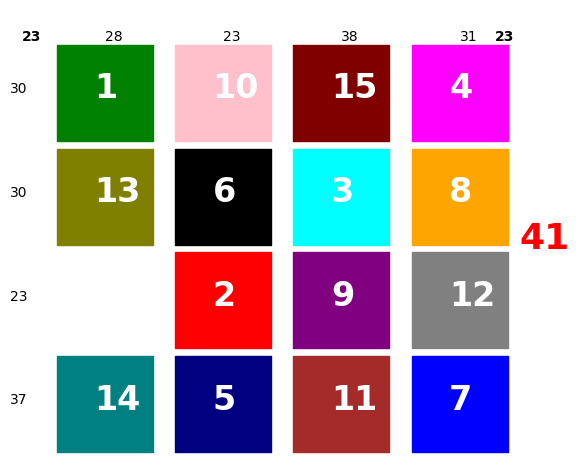

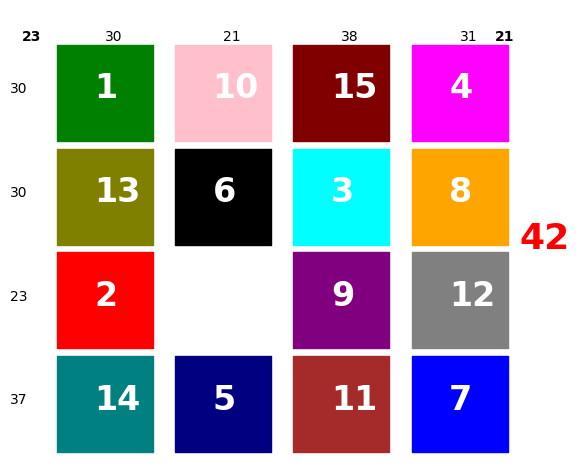

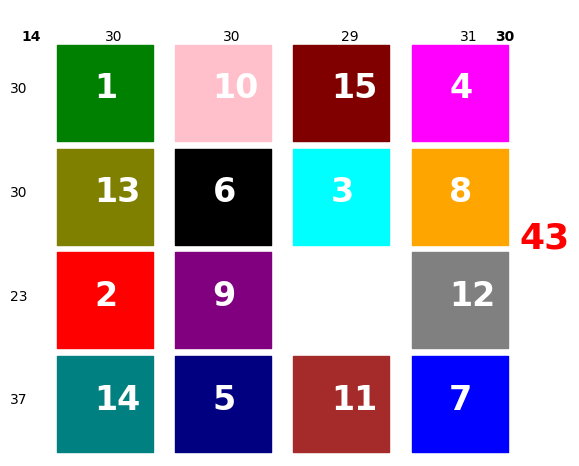

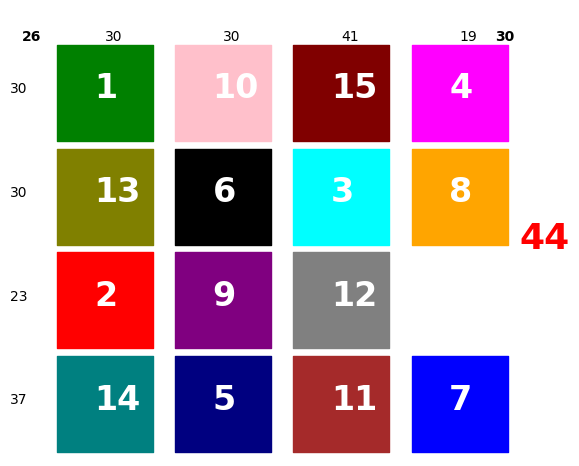

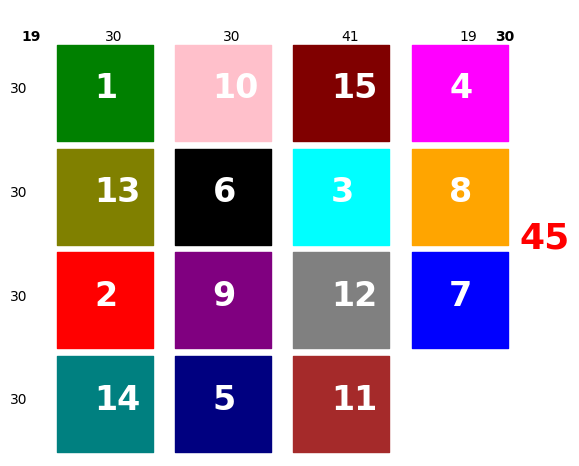

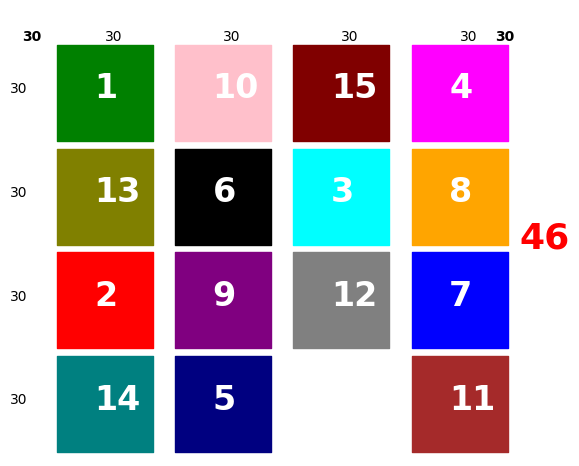

In [ ]:
for t in [i for i in range(41,47)]:
  #if solver.Value(cont[t])==0 and t ==48:
  #if solver.Value(cont[t])==0 and t ==48:
  plt.figure(figsize=(6,5))

  for n in nodes:
    x1,y1 = dic[n,'x'],dic[n,'y']
    meghdar  = int(solver.Value(V[n,t]))
    plt.scatter(x1,y1,s=4700, c = colors[meghdar], marker = 's')
    plt.text(x1-0.09,y1-0.05,s=str(meghdar), fontsize = 24,fontweight = 'bold', c = 'w')

  for r in range(nx):
    x,y = -0.8 , r
    plt.text(x,y, sum([int(solver.Value(V[n,t])) for n in nodes if dic[n,'y'] == r]) )

    x,y = r, 3.5
    plt.text(x,y, sum([int(solver.Value(V[n,t])) for n in nodes if dic[n,'x'] == r]) )

  x,y = -0.7 , 3.5
  plt.text(x,y, sum([int(solver.Value(V[n,t])) for n in diag2]), fontweight='bold' )

  x,y = 3.3 , 3.5
  plt.text(x,y, sum([int(solver.Value(V[n,t])) for n in diag1]), fontweight='bold' )

  x,y = 3.5, 1.5
  plt.text(x,y, s = str(t), fontweight='bold', fontsize=26 , c = 'r')

  plt.xlim(-0.5,3.8)
  plt.ylim(-0.5,3.8)
  plt.tight_layout()
  plt.axis('off')
  plt.savefig(f'IBM{t}.png', format='png', bbox_inches='tight', dpi=500)
  FILE.download(f'IBM{t}.png')
  #plt.close()


# Settings Section